# Confidence interval of a mean

Its calculation depends on the size of the sample and the variability of the values (SD).
A CI of the mean shows how precisely you have determined the population mean.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## How to calculate the CI of a mean

The most common method of computing the CI of a mean is based on the assumption that the data are sampled from a population that follows a Gaussian distribution.
The CI is centered on the sample mean ($m$). To calculate the width requires taking account of the SD ($s$), the number of values in the sample ($n$), and the degree of confidence we desire (usually 95%).

Use the table below to determine the value of a constant called a _constant or critical value from the t distribution_, denoted by the nonstandard abbreviation **$t^*$**.
When computing a CI of a mean, $df$ equals $n-1$, more generally, $df$ equals $n$ minus the number of parameters being estimated.

In [50]:
a=.8
b=.9
c=.95
d=.975
e=.99
f=.995

print(" Constants of t distribution with df degrees of freedom")
print("=======================================================")
#print("Probability less than the critical value (t(1-alpha, df))")

print(f"df\t{a:7.3f}\t{b:7.3f}\t{c:7.3f}\t{d:7.3f}\t{e:7.3f}\t{f:7.3f}")
print("-------------------------------------------------------", end='')
for df in range(1, 16):
	print(f"\n{df}", end="")
	for alpha in [a,b,c,d,e,f]:
		print(f"\t{stats.t(df=df).ppf((1+alpha)/2):7.3f}", end="")
     
# with open('table_t_2-tailed.txt', 'w') as file:
# 	print("Critical values of Student's t distribution with df degrees \
# 	   of freedom", file=file)
# 	print("Probability less than the critical value (t(1-alpha, df))", file=file)
	
# 	print(f"df\t{a:4.3f}\t{b:4.3f}\t{c:4.3f}\t{d:4.3f}\t{e:4.3f}\t{f:4.3f}", file=file)
# 	print("-------------------------------------------------------", end='', file=file)
# 	for df in range(1, 16):
# 		print(f"\n{df}", end="", file=file)
# 		for alpha in [a,b,c,d,e,f]:
# 			print(f"\t{stats.t(df=df).ppf((1+alpha)/2):4.3f}", end="", file=file)

 Constants of t distribution with df degrees of freedom
df	  0.800	  0.900	  0.950	  0.975	  0.990	  0.995
-------------------------------------------------------
1	  3.078	  6.314	 12.706	 25.452	 63.657	127.321
2	  1.886	  2.920	  4.303	  6.205	  9.925	 14.089
3	  1.638	  2.353	  3.182	  4.177	  5.841	  7.453
4	  1.533	  2.132	  2.776	  3.495	  4.604	  5.598
5	  1.476	  2.015	  2.571	  3.163	  4.032	  4.773
6	  1.440	  1.943	  2.447	  2.969	  3.707	  4.317
7	  1.415	  1.895	  2.365	  2.841	  3.499	  4.029
8	  1.397	  1.860	  2.306	  2.752	  3.355	  3.833
9	  1.383	  1.833	  2.262	  2.685	  3.250	  3.690
10	  1.372	  1.812	  2.228	  2.634	  3.169	  3.581
11	  1.363	  1.796	  2.201	  2.593	  3.106	  3.497
12	  1.356	  1.782	  2.179	  2.560	  3.055	  3.428
13	  1.350	  1.771	  2.160	  2.533	  3.012	  3.372
14	  1.345	  1.761	  2.145	  2.510	  2.977	  3.326
15	  1.341	  1.753	  2.131	  2.490	  2.947	  3.286

### The CI and the SEM

Calculate the margin of error of the CI, $W$, which is half the width of the CI:

$$W=\frac{t^*\times s}{\sqrt{n}}$$

We will see that the standard error of the mean (SEM) is the SD divided by the square root of sample size: $\text{SEM}=\frac{s}{\sqrt{n}}$.
We can combine it with the equation of the margin of error of the CI above: $$W=t^* \times \text{SEM}$$

Therefore, the SEM quantifies how precisely we know the population mean. E.g. if the goal is to compare means with  a t test, ANOVA, or to show how closely the data come to the predictions of a model, we are likely to show how precisely the define the population mean, rather than to show variability among values. In this case, the best approach is to plot the 95% CI of the mean. The SD quantifies variation.

In [20]:
# we generate some fake data from a normal distribution

samples_12 = np.random.normal(loc=36.8, scale=0.4, size=12)
samples_130= np.random.normal(loc=36.8, scale=0.4, size=130)

# we then compute the corresponding CI using the t-distribution (explained in another notebook)
def W_data(data, conf=0.95):
    t=stats.t(df=len(data)-1).ppf((1+conf)/2)
    return t*stats.sem(data)

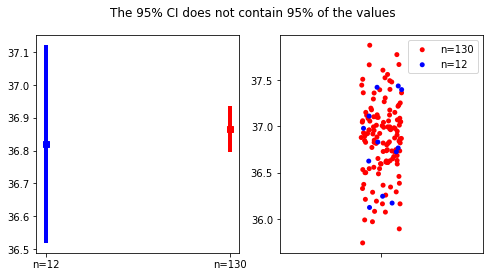

In [59]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.errorbar(y=np.mean(samples_12), x=1, yerr=W_data(samples_12), fmt='s', color='b', elinewidth=4)
plt.errorbar(y=np.mean(samples_130), x=2, yerr=W_data(samples_130), fmt='s', color='r', elinewidth=4)
plt.xticks(ticks=[1,2], labels=["n=12", "n=130"])

plt.suptitle("The 95% CI does not contain 95% of the values")

plt.subplot(122)
sns.stripplot(y=samples_130, color='red', label='n=130')
sns.stripplot(y=samples_12, color='blue', label='n=12')
plt.legend();

### Computing CI using stats

#### Bayesian approach

Associate to $\theta$ a probability measuring our belief; $x_1 ... x_n$ are fixed observations; update posterior belief on $\theta$; build interval containing $\theta$ with probability = 95%.

In [97]:
print(stats.bayes_mvs(samples_130, alpha=.95)) # CI (like GraphPad Prism) of the mean, std, variance = credible interval

(Mean(statistic=36.86631076286896, minmax=(36.79642047513279, 36.936201050605135)), Variance(statistic=0.16477075713713396, minmax=(0.12890860933092252, 0.21040940338282652)), Std_dev(statistic=0.4051213834730015, minmax=(0.3590384510479658, 0.4587040477070444)))


#### Fequentist approach

$\theta$ is fixed, but unknown; $X_1 ... X_n$ are drawn from $F_\theta$ 10 times; build interval for each $(X_1 ... X_n)$; 19/20 of the intervals contain the true $\theta$

In [98]:
print(stats.norm.interval(alpha=0.95, loc=np.mean(samples_130), scale=np.std(samples_130, ddof=1))) # frequentist confidence interval (normal method)

(36.07691432010519, 37.65570720563274)


### CI of the SD

A CI can be determined for nearly any value you calculate from a sample of data. Given the assumptions as those used when interpreting the CI of the mean (i.e. population distributed at least approximately in a Gaussian manner, random/representative sample, independent observations, accurate data, and assessing an event that we really care about), we are 95% sure that the calculated interval contains the trus population SD.

## What is the t distribution?

Let's assume we know that a population follows a Gaussian distribution. The mean of this population is designated by $\mu$. Let's assume we also know the population SD, designated by $\sigma$. By repeating random selection of $n$ values from this population, computing the mean $m$ and SD $s$, and for each random sample we compute $t$:
$$t=\frac{m - \mu}{s / \sqrt{n}}$$

The $t$ ratio is equally likely to be positive or negative, it will usually be failry close to zero. How far from zero depends on the sample size $n$, the SD $s$ and chance.

Mathematical statisticians have derived the distribution of $t$ using calculus.

In [83]:
# set the parameters
n = 12
df = n - 1

# set the Gaussian model
tdistrib = stats.t(df=df)

# define the x space based of the PPF from the model, basically from min to max
x = np.linspace(
    tdistrib.ppf(0.0001),
    tdistrib.ppf(0.9999),
    num=100
)

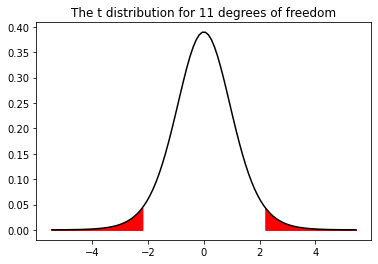

In [90]:
# plot the entire Gaussian curve
plt.plot(x, tdistrib.pdf(x), 'k')


select1 = np.linspace(tdistrib.ppf(q=0.0001), tdistrib.ppf(q=0.0250), num=50)
select2 = np.linspace(tdistrib.ppf(q=0.9750), tdistrib.ppf(q=0.9999), num=50)

plt.fill_between(
    select1,
    tdistrib.pdf(select1),
    color='red',
)

plt.fill_between(
    select2,
    tdistrib.pdf(select2),
    color='red',
)

plt.title(f"The t distribution for {df} degrees of freedom");

The area under the curve represents all possible samples. Chop off the 2.5% tails on each side to determine a range of $t$ ratios that includes 95% of the samples.

In [89]:
# for this example with df=11
t_ratio1 = tdistrib.ppf(0.025)
t_ratio2 = tdistrib.ppf(0.975) # basically equals (1 + alpha) / 2
print(f"the t ratio has value between {t_ratio1:5.3f} and {t_ratio2:5.3f} in 95% of the samples.")

the t ratio has value between -2.201 and 2.201 in 95% of the samples.


Let's define the variable **$t^*$** to equal 2.201.

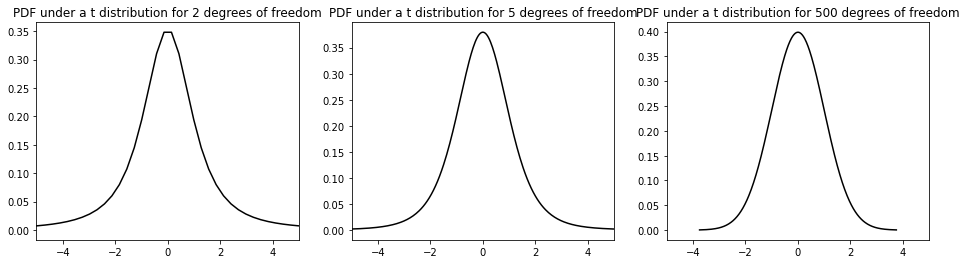

In [94]:
# we plot 3 subplots one for each df
f = plt.figure(figsize=(16,4))

for i,DF in enumerate([2, 5, 500]):
    plt.subplot(1, 3, i+1)

    tdistrib = stats.t(df=DF)
    # plot the entire Gaussian curve
    x = np.linspace(
        tdistrib.ppf(0.0001),
        tdistrib.ppf(0.9999),
        num=500
    )
    plt.plot(x, tdistrib.pdf(x), 'k')

    plt.xlim((-5,5))

    plt.title(f"PDF under a t distribution for {DF} degrees of freedom");

### The flip!

In any one sample, the sample mean and SD are known, as is the sample size. What is not known is the population mean. That is why we want to generate a CI.
We can therefore solve:

$$\mu = m \pm t^* \times \frac{s}{\sqrt{n}}$$

## CI of a mean via resampling (bootstraping)

_Resampling_ is an alternative approach to statistics that does not assume a Gaussian (or any) distribution.

The first step is to generate many more pseudosamples via resampling (with replacement) of the same number of values as the original set. For each pseudosample, compute the mean (or any parameter). Next determine the 2.5th and 97.5th percentiles of that list of pseudosamples. **The range of values that contains 95% of the resampled means is also the 95% CI of the population mean.**

The resamples CI is nearly identical to the CI computed using the conventional method which assumes a Gaussian distribution). Plenty of theoritical and practical (simulation) work has validated this approach, which some statisticians think should be widely used.

The central limit theorem tells us that if we take enough simple random samples, we can get an excellent approximation of our population means. The more samples we take, the closer the means of our sample means will get to the population mean.

[0.062 0.203]


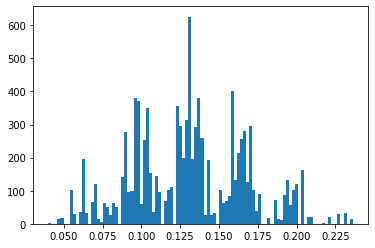

In [105]:
N=10000 # number of pseudosamples
data = np.array([.217, .241, .04, .08, .075]) # original data set
bootstrap = [np.mean(np.random.choice(data, size=len(data), replace=True)) for i in range(N)]
ci = np.percentile(bootstrap, [2.5, 97.5])
print(ci)
plt.hist(bootstrap, bins=100);

In [106]:
stats.bayes_mvs(data, alpha=.95)

(Mean(statistic=0.1306, minmax=(0.016946702030056313, 0.24425329796994366)),
 Variance(statistic=0.0167566, minmax=(0.003007478911383861, 0.06918232076298593)),
 Std_dev(statistic=0.11471967078398404, minmax=(0.05484048606079145, 0.2630253234253043)))

In [112]:
np.mean(data) - W_data(data, conf=0.95), np.mean(data) + W_data(data, conf=0.95)

(0.01694670203005634, 0.24425329796994366)

In [114]:
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=np.std(data, ddof=1))

(-0.04880148950725463, 0.3100014895072546)

### CI of a proportion via resampling

[24. 42.]


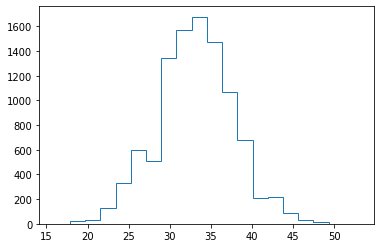

In [122]:
samples = np.random.binomial(100, .33, size=10000) # for 33% in a population of 100
ci = np.percentile(samples, [2.5, 97.5])
print(ci)
plt.hist(samples, histtype='step', bins=20);